<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Ridge_Regularization_(delivery_time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
files=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [3]:
data = pd.read_csv("delivery_time.csv")
data


,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
# input 
X = pd.DataFrame(data['Sorting_time'])

#output 
Y = pd.DataFrame(data['Delivery_time'])

In [5]:
X

,Sorting_time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [6]:
Y

,Delivery_time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [7]:
#Splitting data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.10,random_state=0)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((18, 1), (18, 1), (3, 1), (3, 1))

In [8]:
y_train

,Delivery_time
1,13.50
11,10.75
10,19.83
14,12.03
18,8.00
6,19.00
19,17.83
4,29.00
2,19.75
5,15.35


In [10]:
# Apply Linear Regression Model 
from sklearn.linear_model import LinearRegression
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 
pred_train=lreg.predict(x_train)


In [11]:
# calculating Mean Squared Error (mse) for Test Data
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# calculating Mean Squared Error (mse) for Train Data
mean_squared_error1 = np.mean((pred_train - y_train)**2) 
print("Mean squared Error on train set : ", mean_squared_error1)

Mean squared Error on test set :  Delivery_time    29.405749
dtype: float64
Mean squared Error on train set :  Delivery_time    4.715185
dtype: float64


In [12]:
# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.DataFrame(lreg.coef_) 
lreg_coefficient


,Columns,Coefficient Estimate
0,Sorting_time,1.916703


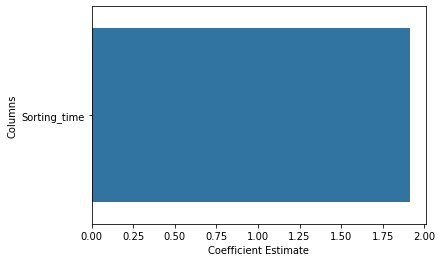

In [13]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [23]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.DataFrame(ridgeR.coef_) 
ridge_coefficient

Delivery_time    28.983369
dtype: float64


,Columns,Coefficient Estimate
0,Sorting_time,1.898292


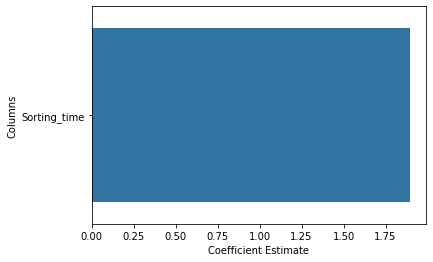

In [24]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)